# **Insper - Eletromagnetismo e Ondulatória** #


**Aula 10 - Modelo elétrico do transformador**

**Item 5** - Calculando correntes e tensões em um transformador AC



In [47]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt


---
Na célula a seguir:

a) Declare os parâmetros de nosso transformador: $R_1=6\Omega$, $R_2=3\Omega$, $L_1=300mH$, $L_2=30mH$, frequência $f=60 Hz$ e tensão $V_1=50cos(\omega t)$.

b) Calcule:

- Frequência angular $\omega$
- Indutância Mútua $M$
- Reatâncias indutivas de $L_1$ e $L_2$, ou seja $XL1$ e $XL2$
- Reatância indutiva mútua $XM$

Obsrvação: o número complexo $j=\sqrt{-1}$ é nativo da linguagem Python. Para escrever $j$, digite "1j"

In [48]:
def indutancia_ressonante(f, C):
    return 1/(4*pi**2*f**2*C)

def impedancia(R, C, L, f):
    omega = 2 * np.pi * f
    Zc = 1/(1j*omega*C) # Impedância do capacitor
    Zl = 1j*omega*L # Impedância do indutor
    Zr = R # Impedância do resistor
    return Zc, Zl, Zr

def impedancia_ZM(L1, L2, K, freq):
    omega = 2 * np.pi * freq
    M = K * np.sqrt(L1*L2)
    Zm = 1j*omega*M
    return Zm

In [49]:
def CalcularTransformadorCapacitorParalelo(ZR1, ZR2, Rc, ZC1, ZC2, ZL1, ZL2, ZM, Uf):
   
    Z = np.array([[ZR1 + ZL1 + ZC1, -ZM], 
                  [-ZM, ZR2 + ZL2 + ((ZC2*Rc)/(ZC2+Rc))]])  # Impedância total
    
    V = np.array([Uf, 0])
    I = np.dot(linalg.inv(Z), V)  # Cálculo da corrente
    
    i1 = I[0]
    i2 = I[1]
    Zeq = Rc*ZC2/(Rc + ZC2)
    V2 = Zeq*i2   #tensao na saída

    # Potência de entrada (no primário)
    P_entrada = np.real(0.5*Uf * np.conj(i1))
    # Potência de saída (no secundário)
    P_saida = np.real(0.5* V2 * np.conj(i2))
    
    eficiencia = 100*P_saida/P_entrada if P_entrada > 0 else 0
    
    v2_real = abs(V2)
    P_resistor = np.real(V2)**2/Rc

    return i1, i2, v2_real, eficiencia, P_resistor
    
def CalcularTransformadorCapacitorSerie(ZR1, ZR2, Rc, ZC1, ZC2, ZL1, ZL2, ZM, Uf):
    
    Z = np.array([[ZR1 + ZL1 + ZC1, -ZM], 
                  [-ZM, ZR2 + ZL2 + ZC2 + Rc]])  # Impedância total
    
    V = np.array([Uf, 0])
    I = np.dot(linalg.inv(Z), V)  # Cálculo da corrente
    
    i1 = I[0]
    i2 = I[1]
    
    V2 = Rc*i2  #tensao na saída
    
    #potencias
    # Potência de entrada (no primário)
    P_entrada = np.real(0.5*Uf * np.conj(i1))
    
    # Potência de saída (no secundário)
    P_saida = np.real(0.5* V2 * np.conj(i2))
    
    eficiencia = 100*P_saida/P_entrada if P_entrada > 0 else 0
    
    v2_real = abs(V2)
    P_resistor = np.real(V2)**2/(Rc)

    return i1, i2, v2_real, eficiencia, P_resistor

############ P_resistor é isso mesmo??

### Declaração de variáveis

In [50]:
frequencias = np.linspace(1, 100e3, 1000)
valores_c2 = [150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6]
Uf = 6    # Tensão de entrada (V1)
Rc = 5    # Resistência de carga (R_C)
R1 = 0.1 # Resistência no primário (R1)
R2 = 0.1  # Resistência no secundário (R2)
K = 0.2  # Coeficiente de acoplamento


### Gráficos

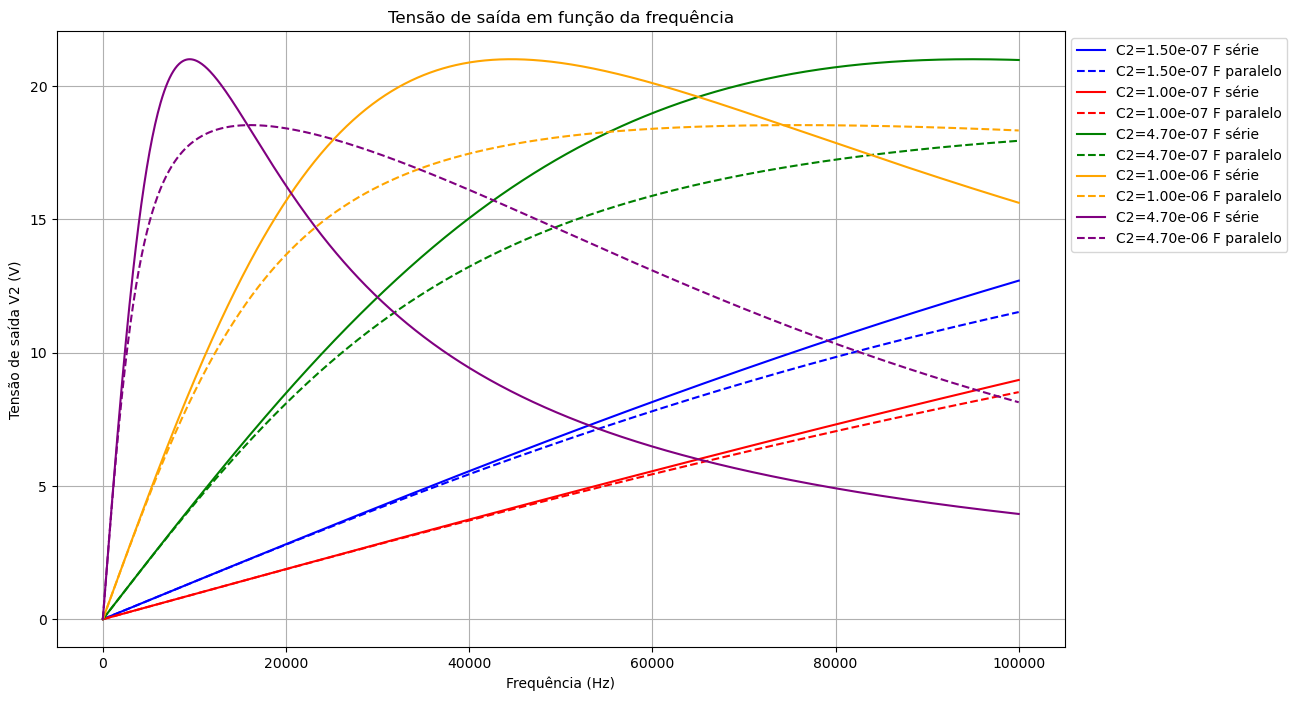

In [51]:
plt.figure(figsize=(13, 8))
cores = ['b', 'r', 'g', 'orange', 'purple']
linestyles = ['-', '--']

for i, C in enumerate(valores_c2):
    V_serie = []
    V_paralelo = []
    ef_serie = []
    ef_paralelo = []
    
    for freq in frequencias:
        L1 = indutancia_ressonante(freq, C)
        L2 = indutancia_ressonante(freq, C)
        ZC1, ZL1, ZR1 = impedancia(R1, C, L1, freq)
        ZC2, ZL2, ZR2 = impedancia(R2, C, L2, freq)
        ZM = impedancia_ZM(L1, L2, K, freq)
        
        i1, i2, V2, eficiencia, P_carga = CalcularTransformadorCapacitorParalelo(ZR1, ZR2, Rc, ZC1, ZC2, ZL1, ZL2, ZM, Uf)
        V_paralelo.append(V2)
        ef_paralelo.append(eficiencia)
        
        i1, i2, V2, eficiencia, P_carga = CalcularTransformadorCapacitorSerie(ZR1, ZR2, Rc, ZC1, ZC2, ZL1, ZL2, ZM, Uf)
        V_serie.append(V2)
        ef_serie.append(eficiencia)
        
    # Plotar tensão do série
    plt.plot(frequencias, V_serie, label=f'C2={C:.2e} F série', color=cores[i], linestyle=linestyles[0])
    
    # Plotar tensão do paralelo
    plt.plot(frequencias, V_paralelo, label=f'C2={C:.2e} F paralelo', color=cores[i], linestyle=linestyles[1])
    
# Configuração do gráfico
plt.title("Tensão de saída em função da frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão de saída V2 (V)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Coloca a legenda à direita do gráfico
plt.grid(True)

# Exibir gráfico
plt.show()

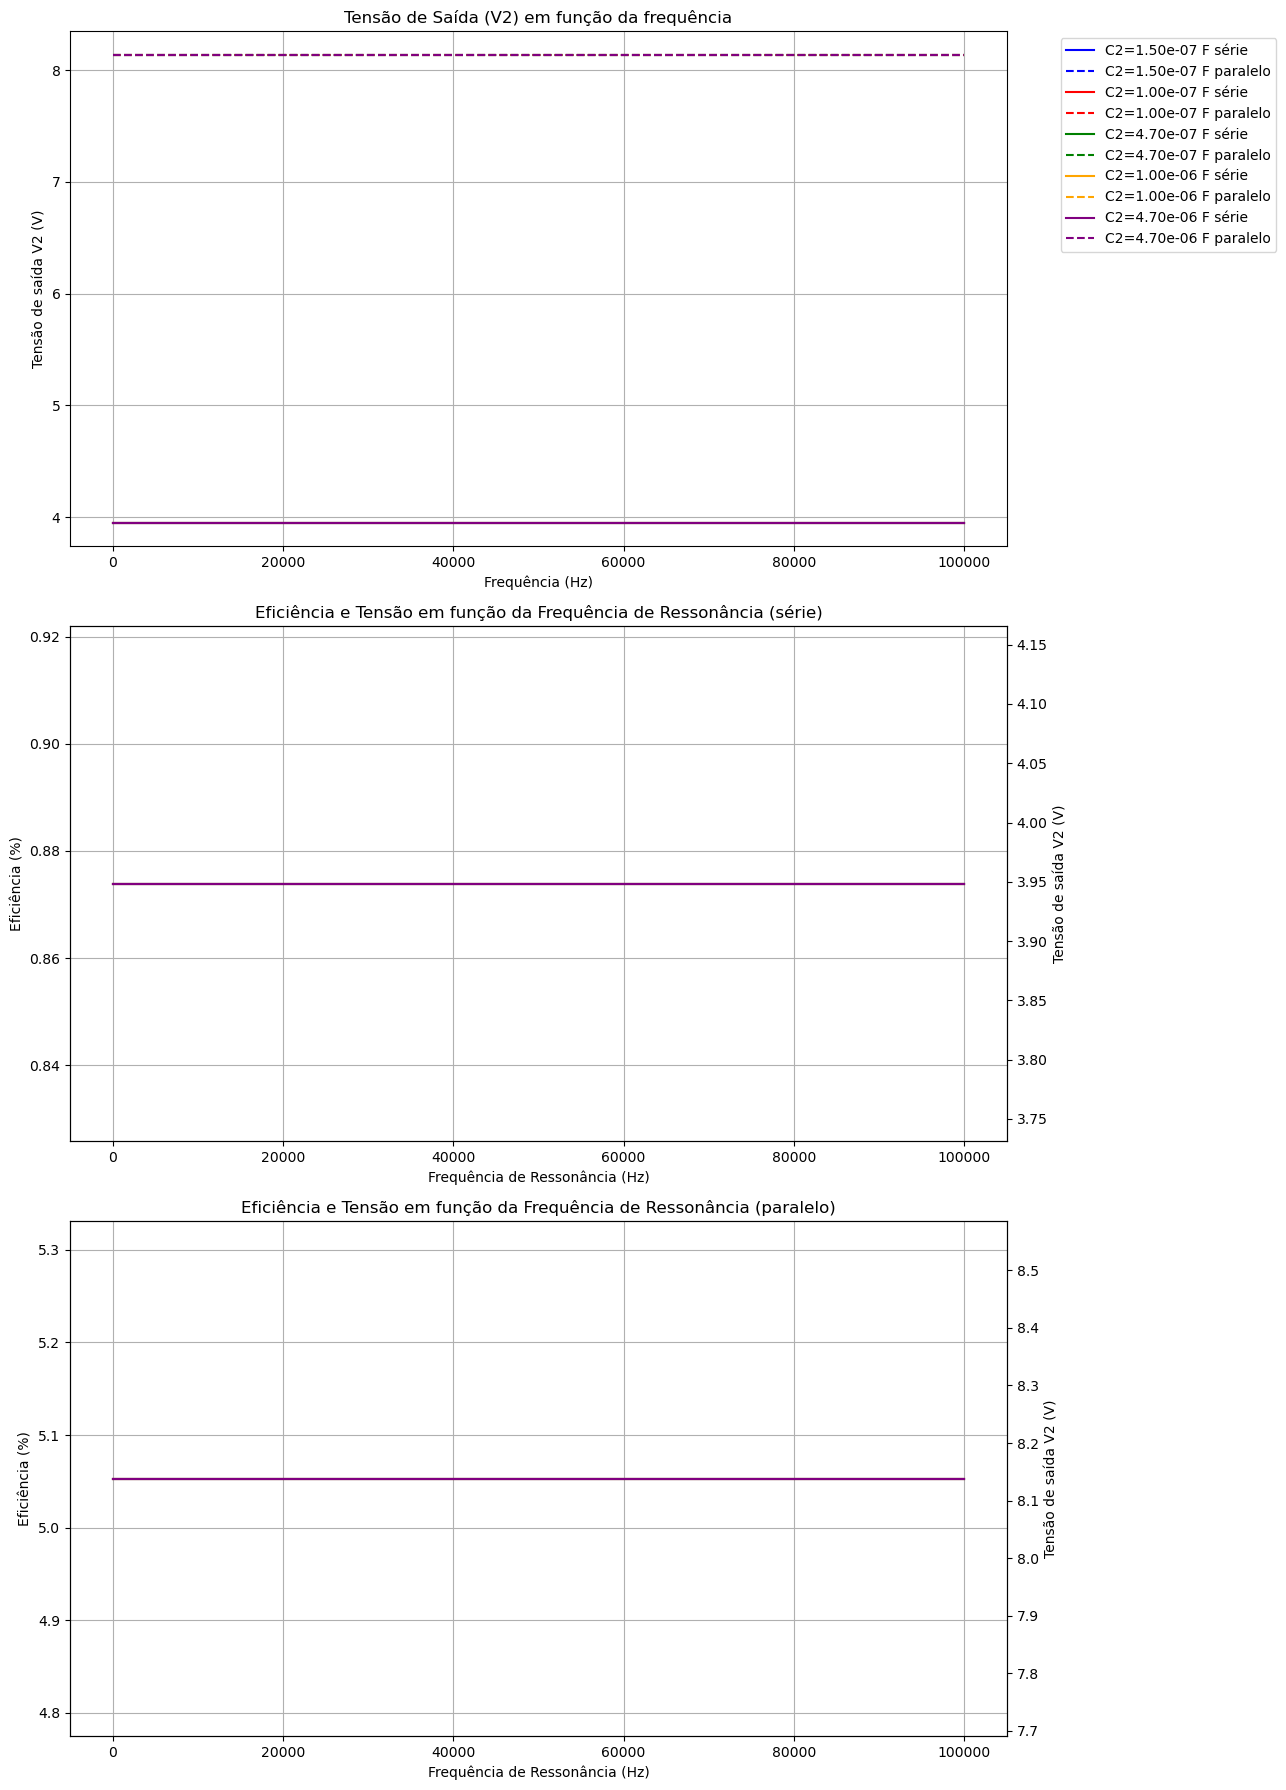

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Criar uma figura com dois subplots verticais
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 18))

cores = ['b', 'r', 'g', 'orange', 'purple']
linestyles = ['-', '--']

for i, C in enumerate(valores_c2):
    V_serie = []
    V_paralelo = []
    ef_serie = []
    ef_paralelo = []
    P_res_serie = []
    P_res_paralelo = []
    
    for freq in frequencias:
        # Calcular para paralelo
        i1, i2, V2, eficiencia, P_res = CalcularTransformadorCapacitorParalelo(ZR1, ZR2, Rc, ZC1, ZC2, ZL1, ZL2, ZM, Uf)
        V_paralelo.append(V2)
        ef_paralelo.append(eficiencia)
        P_res_paralelo.append(P_res)
        
        # Calcular para série
        i1, i2, V2, eficiencia, P_res = CalcularTransformadorCapacitorSerie(ZR1, ZR2, Rc, ZC1, ZC2, ZL1, ZL2, ZM, Uf)
        V_serie.append(V2)
        ef_serie.append(eficiencia)
        P_res_serie.append(P_res)
    
    # Plotar tensão série e paralelo no primeiro gráfico (ax1)
    ax1.plot(frequencias, V_serie, label=f'C2={C:.2e} F série', color=cores[i], linestyle=linestyles[0])
    ax1.plot(frequencias, V_paralelo, label=f'C2={C:.2e} F paralelo', color=cores[i], linestyle=linestyles[1])

    # Plotar eficiência de serie no segundo gráfico (ax2)
    ax2.plot(frequencias, ef_serie, label=f'C2={C:.2e} F série', color=cores[i], linestyle=linestyles[0])
    # Plotar eficiência de paralelo no segundo gráfico (ax2)
    ax3.plot(frequencias, ef_paralelo, label=f'C2={C:.2e} F paralelo', color=cores[i], linestyle=linestyles[0])

# Configurações do gráfico de tensões (ax1)
ax1.set_title("Tensão de Saída (V2) em função da frequência")
ax1.set_xlabel("Frequência (Hz)")
ax1.set_ylabel("Tensão de saída V2 (V)")
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
ax1.grid(True)

# Adicionar um segundo eixo y no gráfico de eficiência (ax2) para mostrar a tensão V2 também
ax2_twin = ax2.twinx()
ax3_twin = ax3.twinx()
for i, C in enumerate(valores_c2):
    # Plotar tensões no eixo à direita
    ax2_twin.plot(P_res_serie, V_serie, label=f'C2={C:.2e} F série',  color=cores[i], linestyle=linestyles[1], alpha=0.5)
    ax3_twin.plot(P_res_paralelo, V_paralelo, label=f'C2={C:.2e} F paralelo',  color=cores[i], linestyle=linestyles[1], alpha=0.5)

# Configurações do gráfico de eficiência (ax2)
ax2.set_title("Eficiência e Tensão em função da Frequência de Ressonância (série)")
ax2.set_xlabel("Frequência de Ressonância (Hz)")
ax2.set_ylabel("Eficiência (%)")
ax2.grid(True)
# Configuração do eixo de tensão no ax2_twin
ax2_twin.set_ylabel("Tensão de saída V2 (V)")



# Configurações do gráfico de eficiência (ax3)
ax3.set_title("Eficiência e Tensão em função da Frequência de Ressonância (paralelo)")
ax3.set_xlabel("Frequência de Ressonância (Hz)")
ax3.set_ylabel("Eficiência (%)")
ax3.grid(True)
# Configuração do eixo de tensão no ax3_twin
ax3_twin.set_ylabel("Tensão de saída V2 (V)")

# Ajustar layout para não sobrepor elementos
plt.tight_layout()

# Exibir gráfico
plt.show()


TypeError: CalcularTransformadorCapacitorParalelo() missing 1 required positional argument: 'Uf'

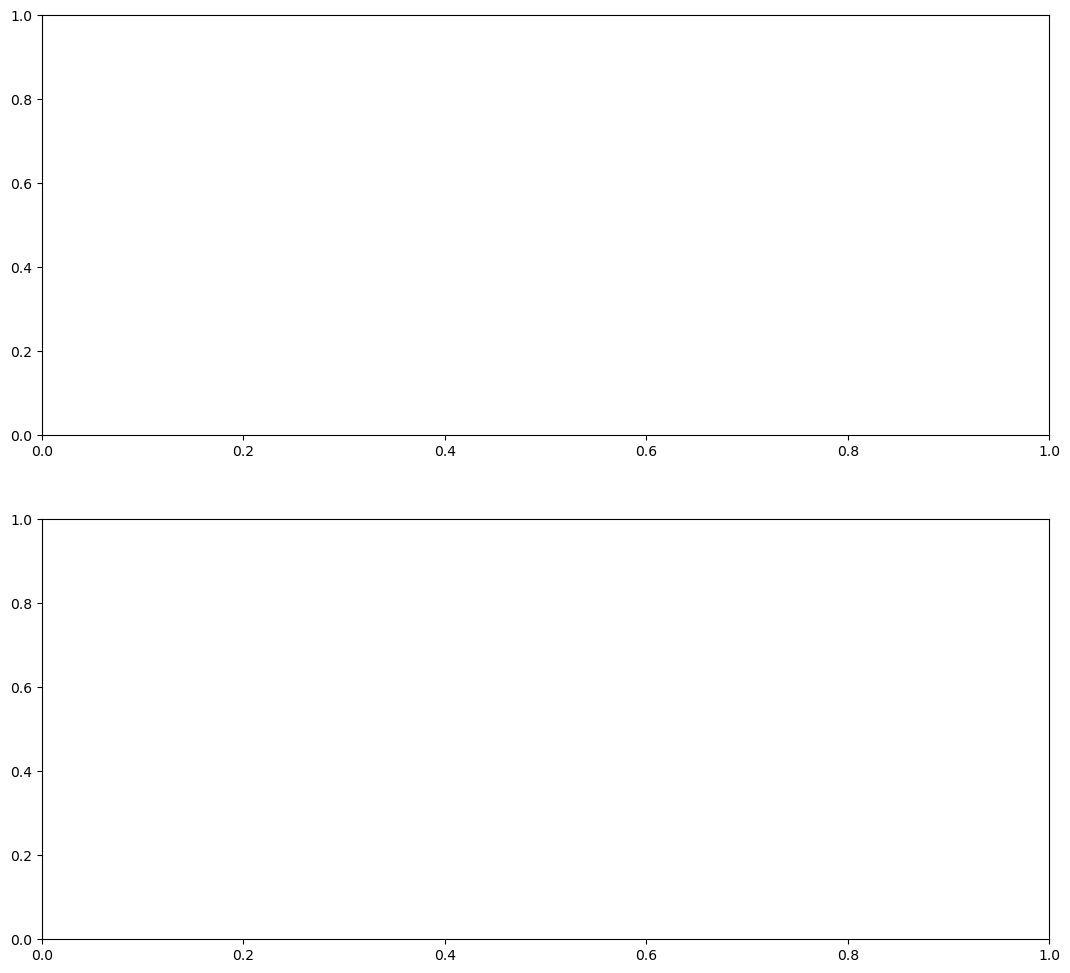

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 12))

cores = ['b', 'r', 'g', 'orange', 'purple']
linestyles = ['-', '--']

for i, C in enumerate(valores_c2):
    V_serie = []
    V_paralelo = []
    ef_serie = []
    ef_paralelo = []
    f_res_serie = []
    f_res_paralelo = []
    
    for freq in frequencias:
        # Calcular para paralelo
        i1, i2, V2, eficiencia, f_res = CalcularTransformadorCapacitorParalelo(R1, R2, Rc, C, C, Uf, freq, K)
        V_paralelo.append(V2)
        ef_paralelo.append(eficiencia)
        f_res_paralelo.append(f_res)
        
        # Calcular para série
        i1, i2, V2, eficiencia, f_res = CalcularTransformadorCapacitorSerie(R1, R2, Rc, C, C, Uf, freq, K)
        V_serie.append(V2)
        ef_serie.append(eficiencia)
        f_res_serie.append(f_res)
    
    # Plotar tensão série no primeiro gráfico (ax1)
    ax1.plot(frequencias, V_serie, label=f'C2={C:.2e} F série', color=cores[i], linestyle=linestyles[0])
    ax2.plot(f_res_serie, ef_serie, label=f'C2={C:.2e} F série', color=cores[i], linestyle=linestyles[0])
    # Plotar tensão paralelo no segundo gráfico (ax2)
    ax1.plot(frequencias, V_paralelo, label=f'C2={C:.2e} F paralelo', color=cores[i], linestyle=linestyles[1])
    ax2.plot(f_res_paralelo, ef_paralelo, label=f'C2={C:.2e} F paralelo', color=cores[i], linestyle=linestyles[1])

# Configurações do gráfico de série (ax1)
ax1.set_title("Tensão Série em função da frequência")
ax1.set_xlabel("Frequência (Hz)")
ax1.set_ylabel("Tensão de saída V2 (V)")
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
ax1.grid(True)

# Configurações do gráfico de paralelo (ax2)
ax2.set_title("Eficieência em função da frequência de ressonância")
ax2.set_xlabel("Frequência de ressonancia (Hz)")
ax2.set_ylabel("Eficiencia (%)")
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
ax2.grid(True)

# Ajustar layout
plt.tight_layout()

# Exibir gráfico
plt.show()


In [514]:
# def CalcularTransformadorCapacitorParalelo(C, freq):
#     omega = 2 * np.pi * freq  # Frequência angular
#     L1 = indutancia_ressonante(freq, C)  # Indutância do primário
#     L2 = indutancia_ressonante(freq, C)  # Indutância do secundário
    
    
#     #CALCULA REATÂNCIAS
#     XL1 = omega * L1 *1j        # Reatância indutiva no primário
#     XL2 = omega * L2 *1j         # Reatância indutiva no secundário
#     XC1 = 1 / (omega * C * 1j)    # Reatância capacitiva no primário
#     XC2 = 1 / (omega * C * 1j)    # Reatância capacitiva no secundário (em paralelo)
#     M = K*((L1*L2)**0.5) # Reatância magnetizante (acoplamento magnético)
#     XM = omega * M * 1j           # Reatância magnetizante
    
#     Z = np.array([[R1 + XL1 + XC1, -XM], 
#                   [-XM, R2 + XL2 + ((XC2*Rc)/(XC2+Rc))]])  # Impedância total
    
#     V = np.array([Uf, 0])
#     i = np.dot(linalg.inv(Z), V)  # Cálculo da corrente
    
#     v2 = i[1] * ((XC2*Rc)/(XC2+Rc))  # Tensão no secundário
    
#     #potencias
#     # Potência de entrada (no primário)
#     P_entrada = 0.5 * np.real(Uf * np.conj(i[0]))
    
#     # Potência de saída (no secundário)
#     P_saida = 0.5 * np.real(v2 * np.conj(i[1]))
    
#     if P_entrada != 0:
#         eficiencia = (P_saida / P_entrada) * 100
#     else:
#         eficiencia = 0
    
#     return i[0], i[1], v2, eficiencia

In [515]:
# def CalcularTransformadorCapacitorSerie(C2, freq):
#     omega = 2 * np.pi * freq  # Frequência angular
#     L1 = indutancia_ressonante(freq, C2)  # Indutância do primário
#     L2 = indutancia_ressonante(freq, C2)  # Indutância do secundário
#     XL1 = omega * L1 *1j        # Reatância indutiva no primário
#     XL2 = omega * L2 *1j         # Reatância indutiva no secundário
#     XC1 = 1 / (omega * C2 * 1j)    # Reatância capacitiva no primário
#     XC2 = 1 / (omega * C2 * 1j)    # Reatância capacitiva no secundário (em paralelo)
#     M = K*((L1*L2)**0.5) # Reatância magnetizante (acoplamento magnético)
#     XM = omega * M * 1j           # Reatância magnetizante
    
#     Z = np.array([[R1 + XL1 + XC1, -XM], 
#                   [-XM, R2 + XL2 + XC2 + Rc]])  # Impedância total
    
#     V = np.array([Uf, 0])
#     i = np.dot(linalg.inv(Z), V)  # Cálculo da corrente
    
#     v2 = i[1] * Rc  # Tensão no secundário
    
#     #potencias
#     # Potência de entrada (no primário)
#     P_entrada = 0.5 * np.real(Uf * np.conj(i[0]))
    
#     # Potência de saída (no secundário)
#     P_saida = 0.5 * np.real(v2 * np.conj(i[1]))
    
#     if P_entrada != 0:
#         eficiencia = (P_saida / P_entrada) * 100
#     else:
#         eficiencia = 0
    
#     return i[0], i[1], v2, eficiencia

In [516]:
# Plotar os resultados
# Plotar os resultados
plt.figure(figsize=(13, 6))
cores = ['b', 'r', 'g', 'orange', 'purple']
linestyles = ['-', '--']


for i, C2 in enumerate(valores_c2):
    V_serie = []
    V_paralelo = []
    
    for freq in frequencias:
        i1, i2, v2_serie, eficiencia_serie = CalcularTransformadorCapacitorSerie(C2, freq)
        i1, i2, v2_paralelo, eficiencia_paralelo = CalcularTransformadorCapacitorParalelo(C2, freq)
        V_serie.append(v2_serie)
        V_paralelo.append(v2_paralelo)
   
    # Plotar tensão do série
    plt.plot(frequencias, V_serie, label=f'C2={C2:.2e} F série', color=cores[i], linestyle=linestyles[0])
    
    # Plotar tensão do paralelo
    plt.plot(frequencias, V_paralelo, label=f'C2={C2:.2e} F paralelo', color=cores[i], linestyle=linestyles[1])
    
# Configuração do gráfico
plt.title("Tensão de saída em função da frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão de saída V2 (V)")
plt.legend()
plt.grid(True)

# Exibir gráfico
plt.show()
    
    

TypeError: CalcularTransformadorCapacitorSerie() missing 6 required positional arguments: 'Rc', 'C1', 'C2', 'Uf', 'freq', and 'K'

<Figure size 1300x600 with 0 Axes>

In [430]:
# Arrays para armazenar os resultados
resultados_paralelo = {}
resultados_serie = {}

# Loop para diferentes capacitores C2
for C2 in valores_c2:
    V2_list_paralelo = []  # Lista para armazenar V2 em diferentes frequências (paralelo)
    V2_list_serie = []     # Lista para armazenar V2 em diferentes frequências (série)
    
    for freq in frequencias:
        # Simulação com C2 em paralelo
        _, _, V2_paralelo, _ = CalcularTransformadorCapacitorParalelo(Uf, Rc, C2, freq)
        V2_list_paralelo.append(np.abs(V2_paralelo))  # Armazena a magnitude da tensão V2
        
        # Simulação com C2 em série
        _,_, V2_serie, _ = CalcularTransformadorCapacitorSerie(Uf, Rc, C2, freq)
        V2_list_serie.append(np.abs(V2_serie))  # Armazena a magnitude da tensão V2
    
    resultados_paralelo[C2] = V2_list_paralelo
    resultados_serie[C2] = V2_list_serie

# Plotar os resultados usando Plotly
fig = go.Figure()

# Adicionar uma curva para cada valor de capacitor C2 (paralelo)
for C2 in valores_c2:
    fig.add_trace(go.Scatter(
        x=frequencias,
        y=resultados_paralelo[C2],
        mode='lines+markers',
        name=f'C2 = {C2} F (Paralelo)',
        line=dict(dash='solid')
    ))

# Adicionar uma curva para cada valor de capacitor C2 (série)
for C2 in valores_c2:
    fig.add_trace(go.Scatter(
        x=frequencias,
        y=resultados_serie[C2],
        mode='lines+markers',
        name=f'C2 = {C2} F (Série)',
        line=dict(dash='dash')
    ))

# Customizar o gráfico
fig.update_layout(
    title='Tensão V2 por Frequência para Diferentes Valores de Capacitor C2',
    xaxis_title='Frequência (Hz)',
    yaxis_title='Tensão V2 (V)',
    xaxis_type='log',  # Escala logarítmica para o eixo X
    yaxis_type='linear',  # Mantém o eixo Y linear
    showlegend=True
)

# Mostrar o gráfico
fig.show()

TypeError: CalcularTransformadorCapacitorParalelo() takes 2 positional arguments but 4 were given

c) Observe a função que criamos na célula abaixo. Tente explicar o que ela faz.

In [259]:
def CalcularTransformador(Uf, Rc):
    Z=np.array([[R1+XL1, -XM],[-XM, XL2+R2+Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

d) Calcule as correntes $i_1$ e $i_2$ para três condições de carga ($R_C=1M\Omega$, $R_C=100\Omega$ e $R_C=1\Omega$). Assim que calcular as correntes, calcule também $V_2$ para cada resistor de carga (analise o circuito para saber como calculá-la). Por fim, calcule as relações $N_1/N_2$, $e_1/e_2$ e $V_1/V_2$ e, o mais importante: calcule as potências no primário ($S1$) e no secundário ($S2$).

IMPORTANTE: para dar print nas relações $N_1/N_2$, $V_1/V_2$ e $e_1/e_2$, você precisará usar o **módulo dos fasores**. Para calcular o módulo de um número complexo, use "np.abs(número complexo)".

In [260]:
# # Use essa célula para implementar o item d)

# Rcs = [1e6, 100, 1]
# Ufonte = 6

# for Rc in Rcs:
#     i1, i2 = CalcularTransformador(Ufonte, Rc)    
#     V2 = i2*Rc
#     V1 = Ufonte

#     e1 = XL1*i1 + XM*i2
#     e2 = XM*i1 + XL2*i2
    
#     S1 = V1/sqrt(2)*i1.conjugate()/sqrt(2)
#     S2 = V2/sqrt(2)*i2.conjugate()/sqrt(2)
    
#     print(f'Com o resistor na carga de {Rc} ohms:')
#     print(f'i1 (pico): {abs(i1)} A')
#     print(f'i2 (pico): {abs(i2)} A')
#     print(f'V1 (pico): {abs(V1)} V')
#     print(f'V2 (pico): {abs(V2)} V')
#     print(f'Relação N1/N2: {abs(sqrt(L1/L2))}')
#     print(f'Relação e1/e2: {abs(e1/e2)}')
#     print(f'Relação V1/V2: {abs(V1/V2)}')
#     print(f'S1 = {S1.real} + {S1.imag}j VA')
#     print(f'S2 = {S2.real} + {S2.imag}j VA')
#     print(f'Eficiência: {S2.real/S1.imag}')
#     print('\n')

e) Recalcule o item **d)**, mas agora considerando que o transformador é **ideal**. Para isso, basta zerar as resistências R1 e R2 do primário e do secundário. Após zer-a-las, copie o código do item d) na célula abaixo. O que você pode concluir sobre a potência real nas três condições de carga?

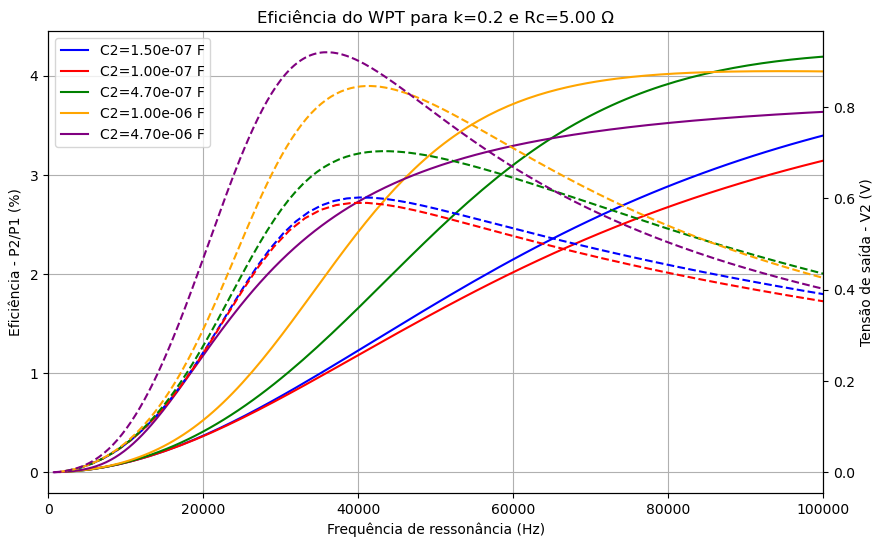

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

# Função para calcular corrente, tensão e eficiência
def CalcularTransformadorCapacitorParalelo(Uf, Rc, C2, freq):
    omega = 2 * np.pi * freq  # Frequência angular
    XL1 = omega * L1 *1j        # Reatância indutiva no primário
    XL2 = omega * L2 *1j         # Reatância indutiva no secundário
    XC1 = 1 / (omega * C1 * 1j)  # Reatância capacitiva no primário
    XC2 = 1 / (omega * C2 * 1j)  # Reatância capacitiva no secundário (em paralelo)
    XM = omega * M * 1j          # Reatância magnetizante
    
    # Impedância total
    Z = np.array([[R1 + XL1 + XC1, -XM], 
                  [-XM, R2 + XL2 + ((XC2*Rc)/(XC2+Rc))]])  # Impedância total
    
    V = np.array([Uf, 0])
    i = np.dot(linalg.inv(Z), V)  # Cálculo da corrente
    
    v2 = i[1] * Rc  # Tensão no secundário
    
    # Potência de entrada (no primário)
    P_entrada = 0.5 * np.real(Uf * np.conj(i[0]))
    
    # Potência de saída (no secundário)
    P_saida = 0.5 * np.real(v2 * np.conj(i[1]))
    
    # Eficiência
    eficiencia = (P_saida / P_entrada) * 100 if P_entrada != 0 else 0
    
    return i[0], i[1], v2, eficiencia

# Definir parâmetros constantes
Uf = 6  # Tensão de entrada
Rc = 5    # Resistência de carga
L1 = 25e-6  # Indutância no primário
L2 = 25e-6  # Indutância no secundário
C1 = 1e-6   # Capacitância no primário
R1 = 5      # Resistência no primário
R2 = 5      # Resistência no secundário
k = 0.2     # Coeficiente de acoplamento
M = k*((L1*L2)**0.5)    # Indutância mútua

# Lista de capacitores e frequências
capacitores = [150e-9, 100e-9, 470e-9, 1e-6, 4.7e-6]

# Criar uma figura com dois eixos y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Criar o segundo eixo y para tensão
ax2 = ax1.twinx()

cores = ['b', 'r', 'g', 'orange', 'purple']

for i, C2 in enumerate(capacitores):
    tensao_saida = []
    eficiencia = []
    
    # Calcular a frequência de ressonância para cada capacitância
    f_res = 1 / (2 * np.pi * np.sqrt(L1 * C2))  # Frequência de ressonância
    
    # Criar uma faixa de frequências em torno da frequência de ressonância
    frequencias = np.linspace(f_res * 0.05, f_res * 10, 500)  # Variação de ±50% ao redor de f_res
    
    # Iterar sobre a faixa de frequências
    for freq in frequencias:
        i0, i1, v2, eta = CalcularTransformadorCapacitorParalelo(Uf, Rc, C2, freq)
        tensao_saida.append(np.abs(v2))  # Valor absoluto da tensão de saída
        eficiencia.append(eta)  # Eficiência
    
    # Plotar eficiência no eixo da esquerda (ax1)
    ax1.plot(frequencias, eficiencia, label=f'C2={C2:.2e} F', color=cores[i], linestyle='-')
    
    # Plotar tensão de saída no eixo da direita (ax2)
    ax2.plot(frequencias, tensao_saida, color=cores[i], linestyle='--')

# Configuração do eixo da esquerda (Eficiência)
ax1.set_xlabel("Frequência de ressonância (Hz)")
ax1.set_ylabel("Eficiência - P2/P1 (%)", color='black')
ax1.set_xlim(0, 100e3)
ax1.tick_params(axis='y', labelcolor='black')

# Configuração do eixo da direita (Tensão de Saída)
ax2.set_ylabel("Tensão de saída - V2 (V)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adicionar título e grid
plt.title("Eficiência do WPT para k=0.2 e Rc=5.00 Ω")
ax1.grid(True)

# Adicionar legenda
ax1.legend(loc="upper left")

# Exibir gráfico
plt.show()
